In [112]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Задача 1
## iii) a), d), e)

In [92]:
x = stats.laplace.rvs(1, size=100)
u = stats.laplace.rvs(1, size=100)

## Пункт а) $f(x) = 2x+5$

In [93]:
y = 2*x+5+u

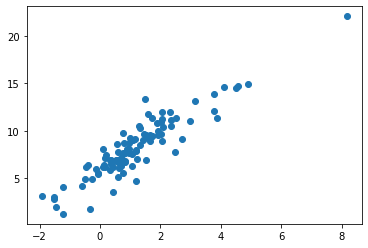

In [94]:
plt.scatter(x,y)

In [95]:
pearson = stats.pearsonr(x, y)
pearson

(0.9150572425085486, 1.9816583564980777e-40)

In [96]:
spearman = stats.spearmanr(x, y)
spearman

SpearmanrResult(correlation=0.8855685568556856, pvalue=2.09994255993076e-34)

In [97]:
kendall = stats.kendalltau(x, y)
kendall

KendalltauResult(correlation=0.7167676767676769, pvalue=4.2674515440171475e-26)

In [98]:
mgc = stats.multiscale_graphcorr(x,y)
'stat = {}, pvalue = {}'.format(mgc.stat, mgc.pvalue)

'stat = 0.7580066968536893, pvalue = 0.001'

## Пункт d) $f(x) = \ln{|x|}$ 

In [99]:
y = np.log(np.absolute(x)) + u

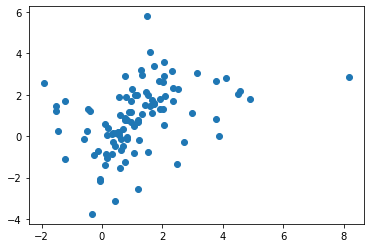

In [100]:
plt.scatter(x,y)

In [101]:
pearson = stats.pearsonr(x, y)
pearson

(0.39780393173185474, 4.158229085762923e-05)

In [102]:
spearman = stats.spearmanr(x, y)
spearman

SpearmanrResult(correlation=0.5351935193519352, pvalue=9.656287544136627e-09)

In [103]:
kendall = stats.kendalltau(x, y)
kendall

KendalltauResult(correlation=0.37333333333333335, pvalue=3.721981515881375e-08)

In [104]:
mgc = stats.multiscale_graphcorr(x,y)
'stat = {}, pvalue = {}'.format(mgc.stat, mgc.pvalue)

'stat = 0.3133300756352633, pvalue = 0.001'

## Пункт e) $f(x) = \sin{x}$ 

In [105]:
y = np.sin(x) + u

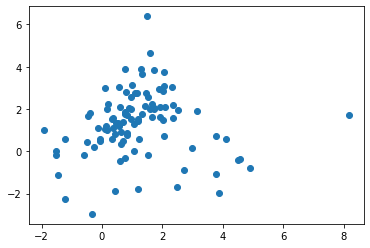

In [106]:
plt.scatter(x,y)

In [107]:
pearson = stats.pearsonr(x, y)
pearson

(0.057334527730832675, 0.5709837264885655)

In [108]:
spearman = stats.spearmanr(x, y)
spearman

SpearmanrResult(correlation=0.2117371737173717, pvalue=0.03444769276226877)

In [109]:
kendall = stats.kendalltau(x, y)
kendall

KendalltauResult(correlation=0.16242424242424244, pvalue=0.016647314641624437)

In [110]:
mgc = stats.multiscale_graphcorr(x,y)
'stat = {}, pvalue = {}'.format(mgc.stat, mgc.pvalue)

'stat = 0.21876107013835264, pvalue = 0.001'

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
pip install hyppo
#from hyppo.independence import HHG

SyntaxError: SyntaxError: invalid syntax (<ipython-input-2-5460422502d0>, line 1)

Исследовать коэффициенты:
- Пирсона
- MGC
- HHG

1) На кольце $np.sqrt(X^2 + Y^2) \in [a, \, b]$ с $a = 0.5, ~b=1$

In [3]:
r = np.random.uniform(0.5, 1, 100)
phi = np.random.uniform(0, 2*np.pi, 100)
x = r*np.cos(phi)
y = r*np.sin(phi)

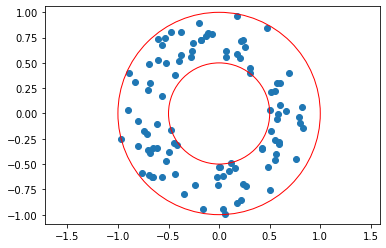

In [4]:
plt.scatter(x,y)
plt.axis('equal')
circle1 = plt.Circle((0, 0), 0.5, color='r',fill=False)
circle2 = plt.Circle((0, 0), 1, color='r',fill=False)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.show()

In [86]:
pearson = stats.pearsonr(x, y)
'stat = {}, pvalue = {}'.format(pearson[0], pearson[1])

'stat = -0.024291895660627536, pvalue = 0.8104075832303448'

In [5]:
mgc = stats.multiscale_graphcorr(x,y)
'stat = {}, pvalue = {}'.format(mgc.stat, mgc.pvalue)

'stat = 0.10866319689342578, pvalue = 0.001'

In [88]:
hhg = HHG().test(x, y)
'stat = {}, pvalue = {}'.format(hhg[0], hhg[1])

'stat = 32265.79902547019, pvalue = 0.000999000999000999'

2. Равномерно на квадрате с вершинами $(\pm 1, \pm 1)$

In [89]:
x = np.random.uniform(-1,1, 100)
y = np.random.uniform(-1,1, 100)

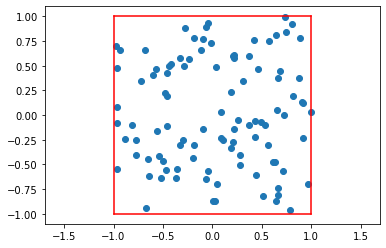

In [90]:
plt.scatter(x,y)
plt.axis('equal')
plt.plot([-1,1], [1, 1], 'r')
plt.plot([-1,1], [-1, -1], 'r')
plt.plot([-1,-1], [-1, 1], 'r')
plt.plot([1,1], [-1, 1], 'r')

In [91]:
pearson = stats.pearsonr(x, y)
'stat = {}, pvalue = {}'.format(pearson[0], pearson[1])

'stat = 0.006567842466417159, pvalue = 0.9482907442203031'

In [92]:
mgc = stats.multiscale_graphcorr(x,y)
'stat = {}, pvalue = {}'.format(mgc.stat, mgc.pvalue)

'stat = -0.010915762970168533, pvalue = 0.826'

In [93]:
hhg = HHG().test(x, y)
'stat = {}, pvalue = {}'.format(hhg[0], hhg[1])

'stat = 9581.623106165342, pvalue = 0.42657342657342656'

3. Равномерно распределенный на четырех кругах с центрами $(\pm 1, \pm 1)$ радиусов $1/2$

In [117]:
tmp = np.array([-1,1])
r = np.random.uniform(0, 0.5, 100)
phi = np.random.uniform(0, 2*np.pi, 100)
x = r*np.cos(phi) + tmp[np.random.randint(0,2, 100)]
y = r*np.sin(phi) + tmp[np.random.randint(0,2, 100)]

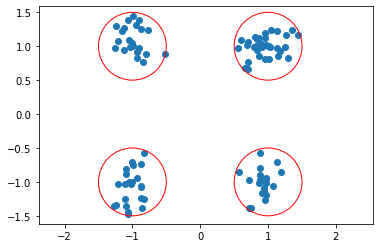

In [118]:
plt.scatter(x,y)
plt.axis('equal')
circle1 = plt.Circle((1, 1), 0.5, color='r',fill=False)
circle2 = plt.Circle((1, -1), 0.5, color='r',fill=False)
circle3 = plt.Circle((-1, -1), 0.5, color='r',fill=False)
circle4 = plt.Circle((-1, 1), 0.5, color='r',fill=False)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)
plt.gca().add_patch(circle4)

In [119]:
pearson = stats.pearsonr(x, y)
'stat = {}, pvalue = {}'.format(pearson[0], pearson[1])

'stat = 0.13582935375675523, pvalue = 0.17782877598393837'

In [120]:
mgc = stats.multiscale_graphcorr(x,y)
'stat = {}, pvalue = {}'.format(mgc.stat, mgc.pvalue)

'stat = 0.008656114332925003, pvalue = 0.175'

In [121]:
hhg = HHG().test(x, y)
'stat = {}, pvalue = {}'.format(hhg[0], hhg[1])

'stat = 12221.493281848916, pvalue = 0.15784215784215785'

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import pingouin as pg

In [6]:
x = np.random.uniform(-1, 1, 100)
y = np.random.uniform(-1, 1, 100)
z = np.random.uniform(-1, 1, 100)

In [7]:
arr = np.array([x,y,z])
A = np.array([[0.5, -1, 0.5], [0.1, 0.5, 1], [1.5, 0.3, 0.1]])
result = A.dot(arr)

In [8]:
u = result[0]
v = result[1]
w = result[2]

In [9]:
df = pd.DataFrame(data = np.array([u, v, w, x, y, z]).T, columns=['U', 'V', 'W', 'X', 'Y', 'Z'])
df.corr()

,U,V,W,X,Y,Z
U,1.000000,0.066031,0.319025,0.465641,-0.812570,0.431030
V,0.066031,1.000000,0.300296,0.148814,0.444798,0.899118
W,0.319025,0.300296,1.000000,0.975803,0.152491,0.173524
X,0.465641,0.148814,0.975803,1.000000,-0.055876,0.102330
Y,-0.812570,0.444798,0.152491,-0.055876,1.000000,0.016601
Z,0.431030,0.899118,0.173524,0.102330,0.016601,1.000000


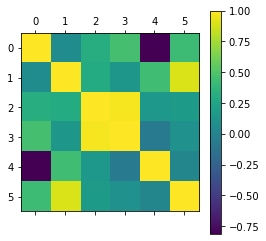

In [93]:
plt.figure(figsize=(20, 20))
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [91]:
df.pcorr()

,U,V,W,X,Y,Z
U,1.000000,0.020245,0.131476,-0.065436,0.892330,-0.385481
V,0.020245,1.000000,0.127889,0.317777,-0.388327,-0.895978
W,0.131476,0.127889,1.000000,-0.962665,-0.322559,0.350576
X,-0.065436,0.317777,-0.962665,1.000000,-0.068606,0.436026
Y,0.892330,-0.388327,-0.322559,-0.068606,1.000000,0.056962
Z,-0.385481,-0.895978,0.350576,0.436026,0.056962,1.000000


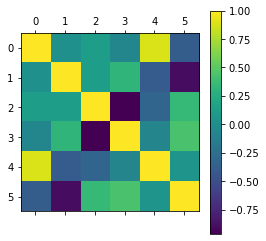

In [92]:
plt.figure(figsize=(20, 20))
plt.matshow(df.pcorr())
plt.colorbar()
plt.show()

NameError: NameError: name 'cax' is not defined

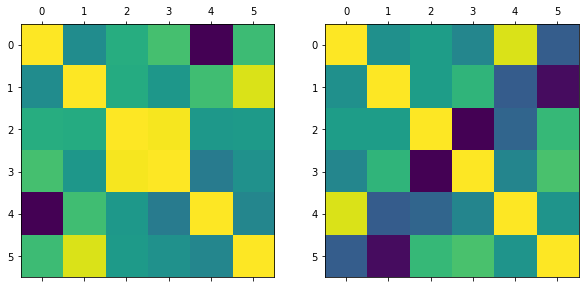

In [43]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax1.matshow(df.corr())
#ax.colorbar()
ax2 = fig.add_subplot(122)
ax2.matshow(df.pcorr())
plt.show()

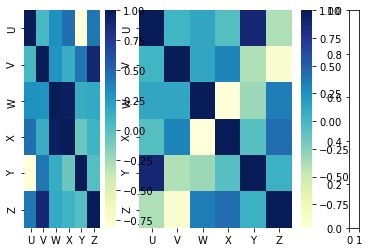

In [89]:
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[5,10, 0.5]})
ax1.get_shared_y_axes().join(ax2)
g1 = sb.heatmap(df.corr(),cmap="YlGnBu",cbar=True,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sb.heatmap(df.pcorr(),cmap="YlGnBu",cbar=True,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
plt.show()

In [66]:
df.pcorr()

,U,V,W,X,Y,Z
U,1.000000,0.020245,0.131476,-0.065436,0.892330,-0.385481
V,0.020245,1.000000,0.127889,0.317777,-0.388327,-0.895978
W,0.131476,0.127889,1.000000,-0.962665,-0.322559,0.350576
X,-0.065436,0.317777,-0.962665,1.000000,-0.068606,0.436026
Y,0.892330,-0.388327,-0.322559,-0.068606,1.000000,0.056962
Z,-0.385481,-0.895978,0.350576,0.436026,0.056962,1.000000


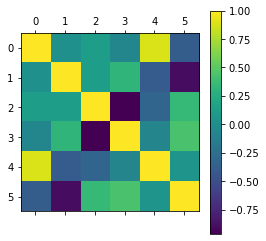

In [19]:
plt.figure(figsize=(20, 20))
plt.matshow(df.pcorr())
plt.colorbar()
plt.show()

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pingouin as pg
import re

ModuleNotFoundError: ModuleNotFoundError: No module named 'pingouin'

In [6]:
pip install pingouin

     |████████████████████████████████| 204 kB 13.3 MB/s 
     |████████████████████████████████| 736 kB 26.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-py3-none-any.whl size=203396 sha256=cca3a4a28fe918e7a2ece321ba9f056f20f83861763d6de82518460c30bbc6d3
  Stored in directory: /home/datalore/.cache/pip/wheels/b8/92/fa/0257fec4f00e04a8801d3d5c37b2492f969a231137e376bd1f
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4961 sha256=43f3e71b4a349188498c400c085f2b84d709c28a44febe27d40bc0a47463a15a
  Stored in directory: /home/datalore/.cache/pip/wheels/6f/cd/a2/e49170b2cf59e88b952f3414f25a54d9f16f033bded4aaab26
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=30293a2d308f32ec3f9ecc6776b579b4226180498afafc477321c357901b6387
  Stored in directory: /home/datalore/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin outdated littleutils
Note: you may need 

In [7]:
df = pd.read_csv('carbon-footprint-2015.txt', sep="\t", engine='python', index_col = False)
df = df.drop('Hybrid', axis=1)
df = df.drop_duplicates(subset=['year    car'])

In [8]:
df = df.rename(columns={df.columns[0]: 'year/car', df.columns[1]:'Highway',  
    df.columns[2]:'Carbon footprint',  df.columns[3] : 'cyl', df.columns[4]: 'Hybrid'})

In [9]:
df

,year/car,Highway,Carbon footprint,cyl,Hybrid
0,2015 Toyota Prius Plug-in Hybrid 1.8 ...,48,133,4,Hybrid
1,2015 Toyota Prius 1.8 L,49,178,4,Hybrid
2,2015 Honda Accord Hybrid 2.0 L,45,188,4,Hybrid
3,2015 Ford Fusion Hybrid FWD 2.0 L,41,209,4,Hybrid
4,2015 Toyota Camry Hybrid LE 2.5 L,39,215,4,Hybrid
5,2015 Ford C-MAX Hybrid FWD 2.0 L,37,225,4,Hybrid
6,2015 Toyota Camry Hybrid XLE/SE 2.5 L,38,224,4,Hybrid
7,2015 Ford C-MAX Energi Plug-in Hybrid ...,36,129,4,Hybrid
8,2015 Ford Fusion Energi Plug-in Hybrid ...,36,129,4,Hybrid
9,2015 Hyundai Sonata Hybrid 2.4 L,40,237,4,Hybrid


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.loc[:,'Hybrid'] = le.fit_transform(df.loc[:,'Hybrid'])

In [11]:
df

,year/car,Highway,Carbon footprint,cyl,Hybrid
0,2015 Toyota Prius Plug-in Hybrid 1.8 ...,48,133,4,1
1,2015 Toyota Prius 1.8 L,49,178,4,1
2,2015 Honda Accord Hybrid 2.0 L,45,188,4,1
3,2015 Ford Fusion Hybrid FWD 2.0 L,41,209,4,1
4,2015 Toyota Camry Hybrid LE 2.5 L,39,215,4,1
5,2015 Ford C-MAX Hybrid FWD 2.0 L,37,225,4,1
6,2015 Toyota Camry Hybrid XLE/SE 2.5 L,38,224,4,1
7,2015 Ford C-MAX Energi Plug-in Hybrid ...,36,129,4,1
8,2015 Ford Fusion Energi Plug-in Hybrid ...,36,129,4,1
9,2015 Hyundai Sonata Hybrid 2.4 L,40,237,4,1


In [12]:
ans = np.array([x.split(' ')[-5] for x in df.loc[:,'year/car']]).astype(np.float)
# ans = np.array([re.findall(r"\d\.\d", x) for x in df.loc[:, 'year/car']]).flatten().astype(np.float)
ans

array([1.8, 1.8, 2. , 2. , 2.5, 2. , 2.5, 2. , 2. , 2.4, 2.4, 2.4, 2.4,
       2. , 2.5, 1.6, 2.5, 2.4, 2.5, 2.5, 1.5, 2.4, 2.5, 2.4, 2.4, 2.5,
       2.5, 1.8, 2.4, 2.4, 2.4, 2. , 2.5, 2. , 3.5, 3.5, 2.5, 2. , 2. ,
       3.5, 2. , 2. , 3.5, 2. , 2. , 2. , 3.6, 3.6, 3.6, 2.4, 3.6, 2. ,
       3.6, 3.6, 3.6, 3.6, 3.6, 3.6])

In [13]:
df.insert(loc=1, column='L', value=ans)

In [14]:
df = df.drop('year/car', axis=1)

In [15]:
df

,L,Highway,Carbon footprint,cyl,Hybrid
0,1.8,48,133,4,1
1,1.8,49,178,4,1
2,2.0,45,188,4,1
3,2.0,41,209,4,1
4,2.5,39,215,4,1
5,2.0,37,225,4,1
6,2.5,38,224,4,1
7,2.0,36,129,4,1
8,2.0,36,129,4,1
9,2.4,40,237,4,1


In [195]:
df.corr()

,L,Highway,Carbon footprint,cyl,Hybrid
L,1.000000,-0.546786,0.572722,0.923065,-0.305869
Highway,-0.546786,1.000000,-0.859625,-0.570458,0.628448
Carbon footprint,0.572722,-0.859625,1.000000,0.583668,-0.818371
cyl,0.923065,-0.570458,0.583668,1.000000,-0.303182
Hybrid,-0.305869,0.628448,-0.818371,-0.303182,1.000000


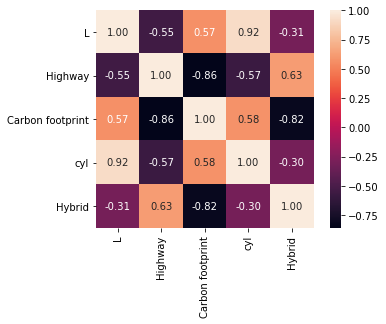

In [203]:
sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

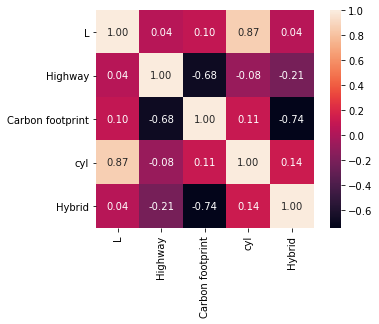

In [208]:
sns.heatmap(df.pcorr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

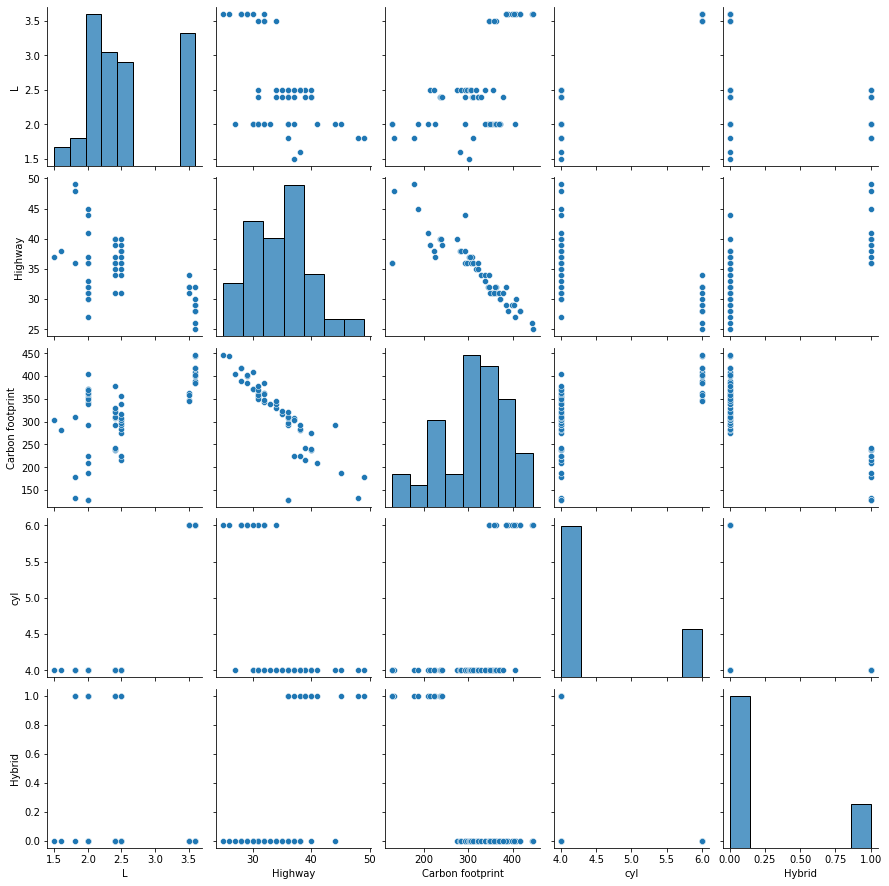

In [210]:
sns.pairplot(df[df.columns], height = 2.5)

In [238]:
def get_stats(df, target, col_names):
    x = df.loc[:,target]
    for it in col_names:
        y = df.loc[:,it]
        print('For <{}> and <{}>'.format(target, it))
        pearson = stats.pearsonr(x, y)
        spearman = stats.spearmanr(x, y)
        kendall = stats.kendalltau(x, y)
        mgc = stats.multiscale_graphcorr(np.array(x), np.array(y))
        print('Pearson:\n  corr = {}\n  pvalue = {}\nSpearmen:\n  corr = {}\n  pvalue = {}\nKendall:\n  corr = {}\n  pvalue = {}\nMGC:\n  corr = {}\n  pvalue = {}\n'
        .format(pearson[0], pearson[1], spearman[0], spearman[1], kendall[0], kendall[1], mgc.stat, mgc.pvalue))

In [239]:
get_stats(df, 'Carbon footprint', df.columns)

For <Carbon footprint> and <L>
Pearson:
  corr = 0.5727215824303147
  pvalue = 2.629720585175672e-06
Spearmen:
  corr = 0.49005530586840595
  pvalue = 9.436318736076894e-05
Kendall:
  corr = 0.3741200780801625
  pvalue = 0.0001237836482461686
MGC:
  corr = 0.3671590833860035
  pvalue = 0.001

For <Carbon footprint> and <Highway>
Pearson:
  corr = -0.8596247184143297
  pvalue = 5.715280016699494e-18
Spearmen:
  corr = -0.9368856549321136
  pvalue = 3.1309894962824867e-27
Kendall:
  corr = -0.83460198971247
  pvalue = 2.4760198722644276e-19
MGC:
  corr = 0.8455490519610661
  pvalue = 0.001

For <Carbon footprint> and <Carbon footprint>
Pearson:
  corr = 1.0
  pvalue = 0.0
Spearmen:
  corr = 0.9999999999999998
  pvalue = 0.0
Kendall:
  corr = 0.9999999999999998
  pvalue = 2.666957625737001e-28
MGC:
  corr = 1.0
  pvalue = 0.001

For <Carbon footprint> and <cyl>
Pearson:
  corr = 0.5836677699836723
  pvalue = 1.5176728194084114e-06
Spearmen:
  corr = 0.6511247856697566
  pvalue = 3.1274344

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import pandas as pd

In [6]:
pip install pingouin

     |████████████████████████████████| 204 kB 21.5 MB/s 
     |████████████████████████████████| 759 kB 28.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-py3-none-any.whl size=203396 sha256=e12c907810a95741f9f4936e6fcdcd360114d6da4659dffd9eb371dba6767848
  Stored in directory: /home/datalore/.cache/pip/wheels/b8/92/fa/0257fec4f00e04a8801d3d5c37b2492f969a231137e376bd1f
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4961 sha256=3d74a79b8411f20b877a1abd2ee39c4bdb43fbd904f7d344812b7398ba42fb97
  Stored in directory: /home/datalore/.cache/pip/wheels/6f/cd/a2/e49170b2cf59e88b952f3414f25a54d9f16f033bded4aaab26
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=7a5715b2c157356d59b9d3b121706fdf236a408696e179d223e911a3be07d03b
  Stored in directory: /home/datalore/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin outdated littleutils
Note: you may need 

In [128]:
names = ['Biacromial diameter', 'Biiliac diameter', 'Bitrochanteric diameter', 'Chest depth', 'Chest diameter', 'Elbow diameter',
'Wrist diameter', 'Knee diameter', 'Ankle diameter', 'Shoulder girth', 'Chest girth', 'Waist girth', 'Navel', 'Hip girth',
'Thigh girth', 'Bicep girth', 'Forearm girth', 'Knee girt', 'Calf maximum girth', 'Ankle minimum girth', 'Wrist minimum girth', 'Age',
'Weight', 'Height', 'Gender']

data = np.loadtxt('body.dat.txt', dtype='object')
df = pd.DataFrame(data=data.astype('float'), columns=names)

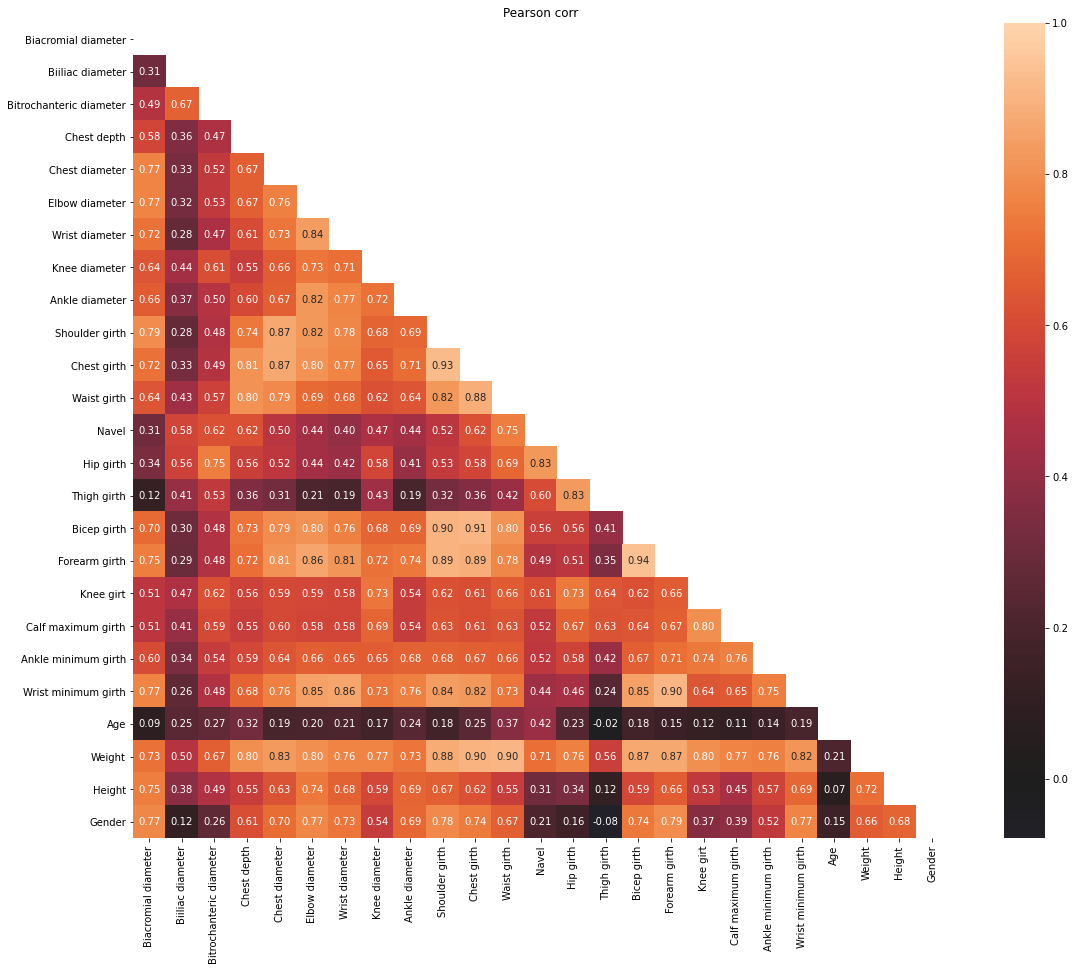

In [153]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
plt.title('Pearson corr')
sns.heatmap(df.corr(), cbar=True, annot=True, mask = mask, vmax=1, center=0, square=True, fmt='.2f', annot_kws={'size': 10})

In [203]:
df.corr().abs().unstack().sort_values().drop_duplicates()[-40:-1]

Calf maximum girth   Knee girt              0.795828
Weight               Chest depth            0.800731
Elbow diameter       Weight                 0.801194
                     Chest girth            0.803140
Waist girth          Chest depth            0.803755
                     Bicep girth            0.804704
Elbow diameter       Bicep girth            0.804784
Chest depth          Chest girth            0.806503
Forearm girth        Chest diameter         0.807118
Wrist diameter       Forearm girth          0.814709
Wrist minimum girth  Weight                 0.816488
Shoulder girth       Elbow diameter         0.819470
Ankle diameter       Elbow diameter         0.821098
Shoulder girth       Waist girth            0.823455
Wrist minimum girth  Chest girth            0.824675
Navel                Hip girth              0.825892
Hip girth            Thigh girth            0.828941
Weight               Chest diameter         0.831465
Wrist diameter       Elbow diameter         0.

In [174]:
corrmap = df.corr()
cols = corrmap.nlargest(5, 'Age')['Age'].index
cols

Index(['Age', 'Navel', 'Waist girth', 'Chest depth',
       'Bitrochanteric diameter'],
      dtype='object')

In [204]:
df.pcorr().abs().unstack().sort_values().drop_duplicates()[-40:-1]

Gender                   Navel                      0.272661
Thigh girth              Bicep girth                0.275760
Bicep girth              Thigh girth                0.275760
Ankle diameter           Knee diameter              0.283241
Knee diameter            Ankle diameter             0.283241
Elbow diameter           Ankle diameter             0.284156
Ankle diameter           Elbow diameter             0.284156
Knee girt                Knee diameter              0.284495
Knee diameter            Knee girt                  0.284495
Waist girth              Navel                      0.310152
Navel                    Waist girth                0.310152
Forearm girth            Wrist minimum girth        0.328259
Wrist minimum girth      Forearm girth              0.328259
Shoulder girth           Chest girth                0.332479
Chest girth              Shoulder girth             0.332479
                         Chest diameter             0.332723
Chest diameter          

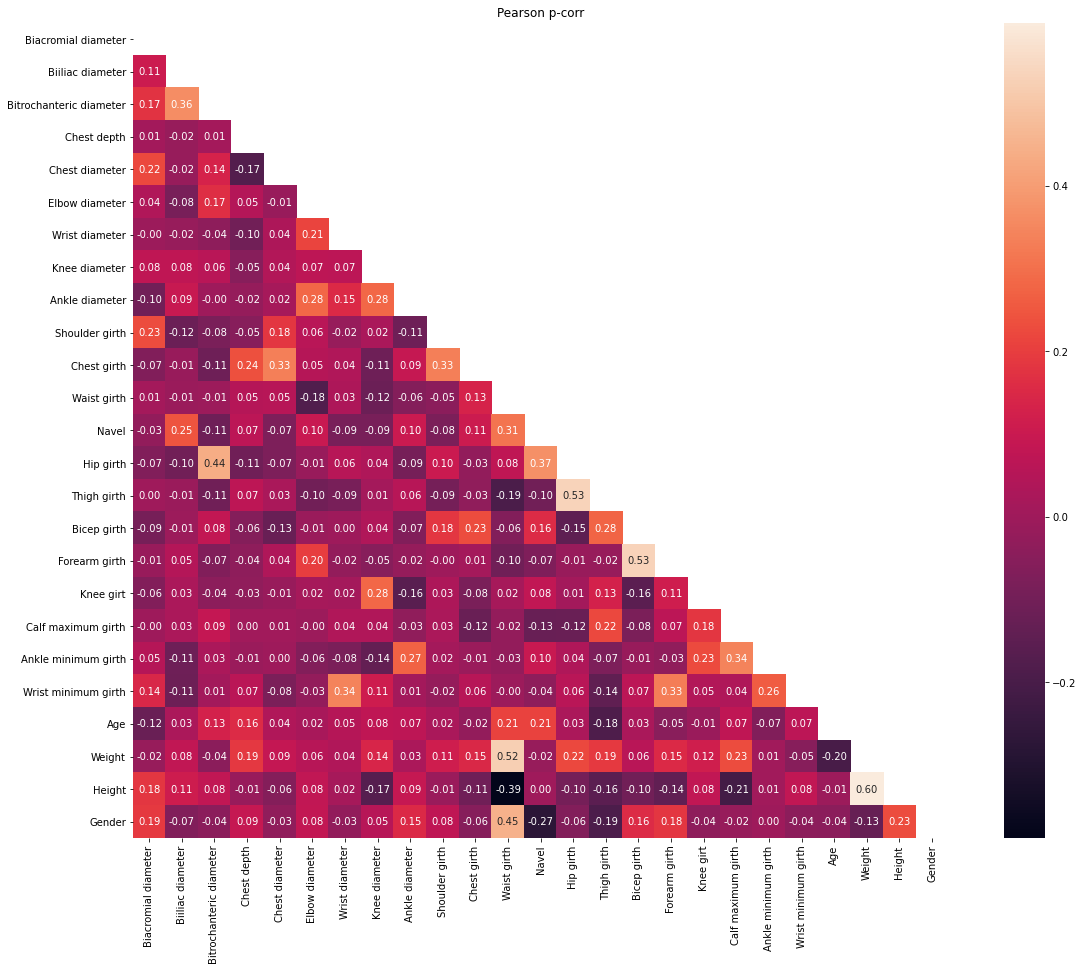

In [143]:
plt.subplots(figsize=(20,15))

mask = np.zeros_like(df.pcorr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Pearson p-corr')
sns.heatmap(df.pcorr(), cbar=True, annot=True, mask = mask, square=True, fmt='.2f', annot_kws={'size': 10})

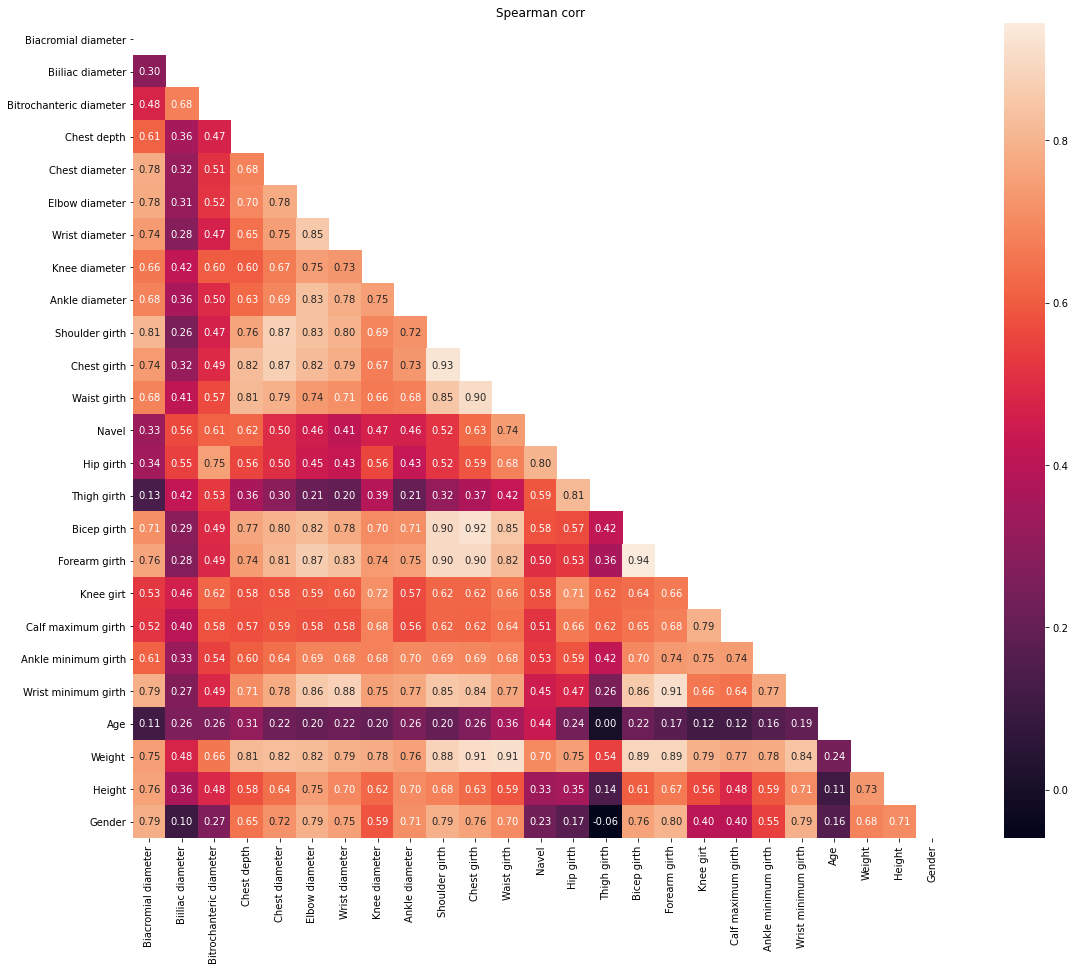

In [146]:
mask = np.zeros_like(df.corr(method='spearman'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
plt.title('Spearman corr')
sns.heatmap(df.corr(method='spearman'), mask = mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

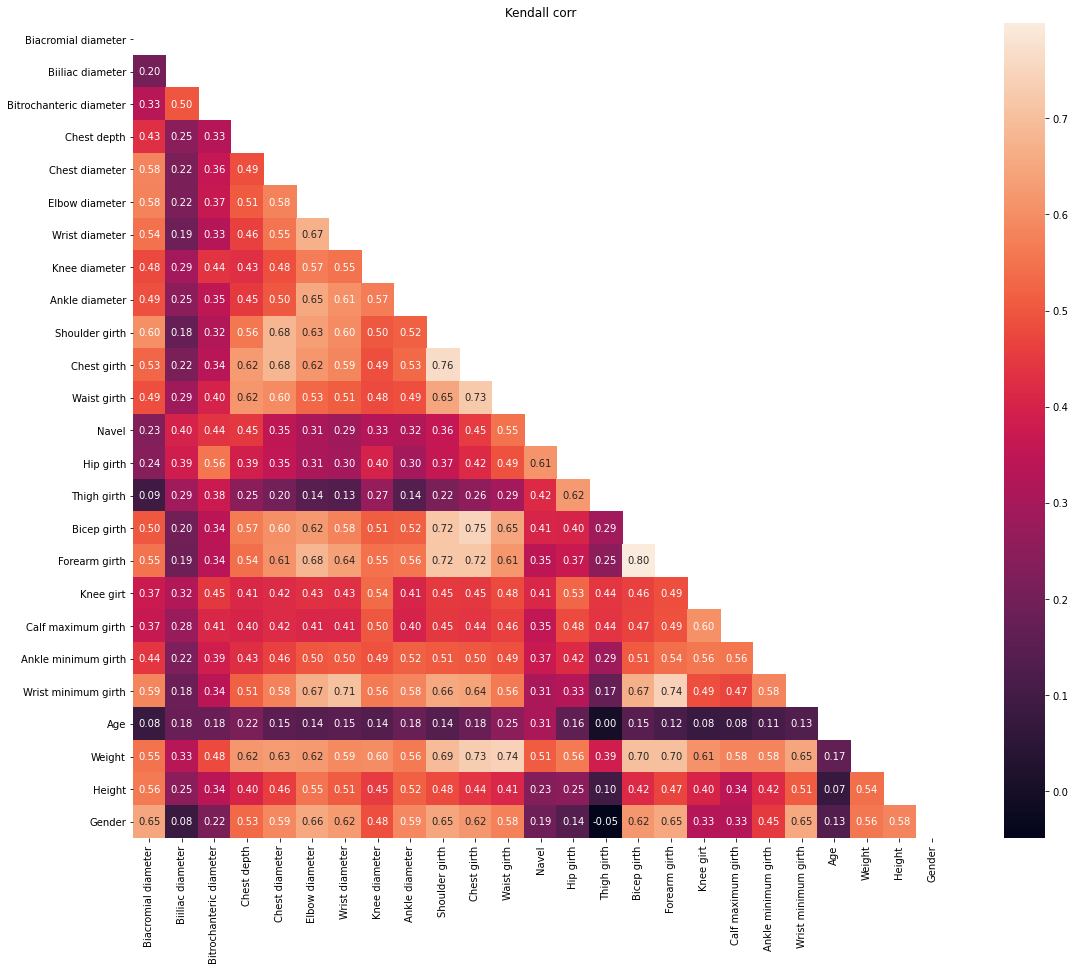

In [147]:
mask = np.zeros_like(df.corr(method='kendall'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
plt.title('Kendall corr')
sns.heatmap(df.corr(method='kendall'), mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [219]:
pg.partial_corr(df, method='pearson', x = 'Chest diameter', y='Chest depth').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,507,0.665,"[0.61, 0.71]",0.442,0.44,0.0,3.395e+62,1.0
